## Air Quality

The goal of this analysis is to predict the temperature given air quality features. This is a **regression** problem as the temperature is represented as a numerical measurement. 

**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

For more info on the data, visit the UCI Machine Learning Library [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

**Attribute Information:**

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)

In [55]:
# Utility 
import pandas as pd
import numpy as np

# Visualization 
%matplotlib inline
import seaborn as sns 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 

### Data Cleaning

In [56]:
# Reading in the data 
df = pd.read_excel('AirQualityUCI.xlsx')

def wrangle(x):
    '''
    args: 
     - x: pandas data frame.
    
    
    This function performs several data cleaning and alteration 
    operations on a given data frame.
    '''

    # Setting the date as the index
    x.set_index('Date', inplace=True)

    # In this data set, null values are denoted with a value of -200
    
    # Removing rows that contain null values
    null = -200
    x = x.replace(null, np.NaN)
    x = x.dropna(axis = 0, how ='any')
      
    return x

wrangle(df)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-30,20:00:00,4.4,1449.25,501.0,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500
2004-04-30,21:00:00,3.1,1362.50,234.0,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888
2004-04-30,22:00:00,3.0,1371.25,212.0,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869


### Data Analysis

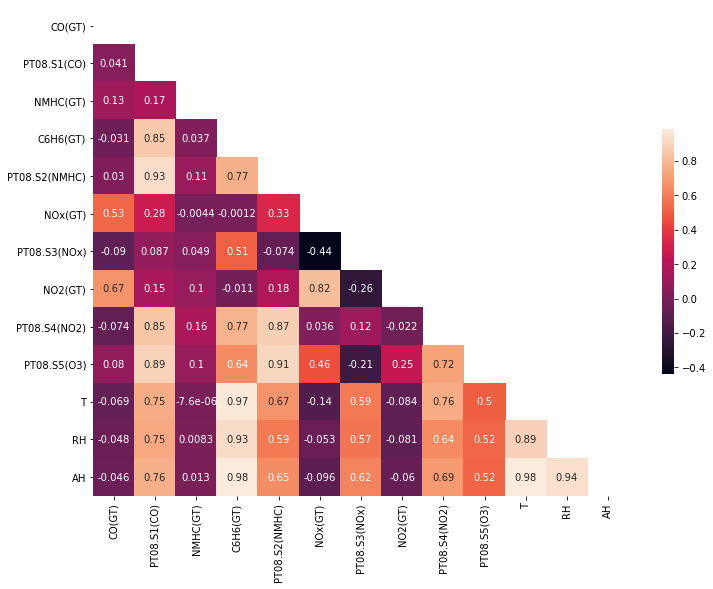

In [57]:
# Correlataion Matrix

def matrix(x):
  '''
  This function returns a correlation matrix of a given data set.
  '''
  
  # Initializing the matrix + its size
  corrmat = df.corr()
  plt.subplots(figsize=(12,9))

  # Matrix parameters
  mask = np.zeros_like(corrmat, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(corrmat, annot=True, cbar_kws={"shrink": .5}, mask=mask)

  return plt.show()

matrix(df)